In [4]:
import numpy as np
from typing import List

import torch
import math
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

import argparse
from tqdm import tqdm

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from statistics import mean, stdev

from source import *
from source_MNIST import *

# Visualize noise

Experiment with the noise_scale

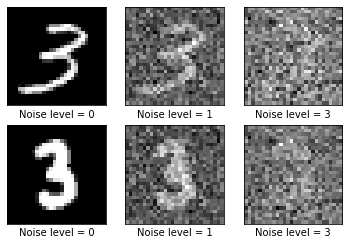

In [37]:
num_samples = 2
m_copies = 2
noise_scale = 3

noisy_threes_sc2, _ = add_noise(
    label=3, n=int(num_samples), m=int(m_copies), verbose =False, noise_scale=1)

noisy_threes_sc3, _ = add_noise(
    label=3, n=int(num_samples), m=int(m_copies), verbose =False, noise_scale=3)

orig_threes = train_features[train_labels == 3]

plt.subplot(2,3,1)
plt.imshow(orig_threes[0][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 0')


plt.subplot(2,3,2)
plt.imshow(noisy_threes_sc2[0][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 1')


plt.subplot(2,3,3)
plt.imshow(noisy_threes_sc3[1][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 3')

plt.subplot(2,3,4)
plt.imshow(orig_threes[1][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 0')


plt.subplot(2,3,5)
plt.imshow(noisy_threes_sc2[m_copies][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 1')


plt.subplot(2,3,6)
plt.imshow(noisy_threes_sc3[m_copies+1][0], cmap="gray")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left = False,
    labelbottom=False,
    labelleft=False)
plt.xlabel('Noise level = 3')

#plt.savefig('noisy_threes.png')
plt.show()


In [ ]:
num_samples = 3
n=3
m = 10
widths = [28*28, 28*28 + 1, 28*28 + 2, n]
num_epochs = 100
num_trials = 5
noise_scale = 3

radnet_final_losses = []
radnet_final_accuracies = []

relunet_final_losses = []
relunet_final_accuracies = []

for trial in tqdm(range(num_trials)):
    rad_los, rad_acc, relu_los, relu_acc = train_both(
        num_samples = n,
        m_copies = m,
        dim_vector= widths,
        verbose=False,
        num_epochs=num_epochs,
        noise_scale =3)
    radnet_final_losses.append(round(rad_los[-1].item(),5))
    radnet_final_accuracies.append(rad_acc[-1].item())
    relunet_final_losses.append(round(relu_los[-1].item(),5))
    relunet_final_accuracies.append(relu_acc[-1].item())
    
print("")
print("Over %d trials, each training for %d epochs:" % (num_trials, num_epochs))
print("")

print("Radnet Loss = {1:.3g} +/- {2:.3e}".
    format(radnet_final_losses, mean(radnet_final_losses), stdev(radnet_final_losses))
)

print("Radnet Accuracy = {1:.3g} +/- {2:.3e}".
    format(radnet_final_accuracies, mean(radnet_final_accuracies), stdev(radnet_final_accuracies))
)

print("ReLU MLP Loss = {1:.3g} +/- {2:.3e}".
    format(relunet_final_losses, mean(relunet_final_losses), stdev(relunet_final_losses))
)

print(
    "ReLU MLP Accuracy = {1:.3g} +/- {2:.3e}".
    format(relunet_final_accuracies, mean(relunet_final_accuracies), stdev(relunet_final_accuracies))
)

In [ ]:
num_trials = 3

for trial in tqdm(range(num_trials)):
    rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = 100,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.05, 
            lr_mlp=0.05,
            noise_scale = 3)

    if trial == 0:
        plt.plot(torch.tensor(rad_los).detach(), color='blue', label='RadNet')
        plt.plot(torch.tensor(relu_los).detach(), color='orange', label='ReLUNet')

    else:
        plt.plot(torch.tensor(rad_los).detach(), color='blue')
        plt.plot(torch.tensor(relu_los).detach(), color='orange')


# Training / test split

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size, shuffle=True)


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
test_featurs, test_labels = next(iter(train_dataloader))

# Scraps

In [ ]:
num_trials = 3

for trial in tqdm(range(num_trials)):
    rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.05, 
            lr_mlp=0.05,
            noise_scale = 0.5)

    if trial == 0:
        plt.plot(torch.tensor(rad_los).detach(), color='blue', label='RadNet')
        plt.plot(torch.tensor(relu_los).detach(), color='orange', label='ReLUNet')

    else:
        plt.plot(torch.tensor(rad_los).detach(), color='blue')
        plt.plot(torch.tensor(relu_los).detach(), color='orange')


In [ ]:
num_trials = 3

for trial in tqdm(range(num_trials)):
    rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = 100,
            dim_vector= widths,
            verbose=False,
            num_epochs=100,
            lr_radnet = 0.01, 
            lr_mlp=0.01,
            noise_scale = 50)

    if trial == 0:
        plt.plot(torch.tensor(rad_los).detach(), color='blue', label='RadNet')
        plt.plot(torch.tensor(relu_los).detach(), color='orange', label='ReLUNet')

    else:
        plt.plot(torch.tensor(rad_los).detach(), color='blue')
        plt.plot(torch.tensor(relu_los).detach(), color='orange')
        
    print(rad_los[-1], relu_los[-1])


In [ ]:
len(mnist_dataset)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

In [ ]:
# Number of original images
n = 3
# Number of noisy samples for each original sample
m = 10
# Widths of both neural networks
widths = [28*28, 28*28 + 1, 28*28 + 2, n]

num_epochs = 100

num_trials = 2

lrs = [0.1, 0.05, 0.01, 0.005]

In [ ]:
if False:
    plt.plot(torch.tensor(model_losses).detach()[:20])    
    plt.show()
    plt.plot(torch.tensor(model_accuracies).detach()[:20])
    plt.show()

In [ ]:
num_trials = 3
num_epochs = 200

#fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.05, 
            lr_mlp=0.05)
        #plt.subplot(1, 2, 1)
        
        if trial == 0:
            plt.plot(torch.tensor(rad_los).detach(), color='blue', label='RadNet')
            plt.plot(torch.tensor(relu_los).detach(), color='orange', label='ReLUNet')

        else:
            plt.plot(torch.tensor(rad_los).detach(), color='blue')
            plt.plot(torch.tensor(relu_los).detach(), color='orange')

        
plt.title("Comparison of convergence rates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
        


In [ ]:
#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()

In [ ]:
num_trials = 3
num_epochs = 100

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.05, 
            lr_mlp=0.05)
        plt.plot(torch.tensor(rad_los).detach())
        plt.plot(torch.tensor(relu_los).detach())
        plt.show()
        #plt.plot(torch.tensor(rad_acc).detach())
        #plt.plot(torch.tensor(relu_acc).detach())
        #plt.show()


In [ ]:
num_trials = 3
num_epochs = 100

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.01, 
            lr_mlp=0.01)
        plt.plot(torch.tensor(rad_los).detach())
        plt.plot(torch.tensor(relu_los).detach())
        plt.show()
        #plt.plot(torch.tensor(rad_acc).detach())
        #plt.plot(torch.tensor(relu_acc).detach())
        #plt.show()

In [ ]:
num_trials = 3
num_epochs = 100

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 0.5, 
            lr_mlp=0.5)
        plt.plot(torch.tensor(rad_los).detach())
        plt.plot(torch.tensor(relu_los).detach())
        plt.show()
        #plt.plot(torch.tensor(rad_acc).detach())
        #plt.plot(torch.tensor(relu_acc).detach())
        #plt.show()
        

In [ ]:
num_trials = 3
num_epochs = 100

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs,
            lr_radnet = 1., 
            lr_mlp=1.)
        plt.plot(torch.tensor(rad_los).detach())
        plt.plot(torch.tensor(relu_los).detach())
        plt.show()
        #plt.plot(torch.tensor(rad_acc).detach())
        #plt.plot(torch.tensor(relu_acc).detach())
        #plt.show()

In [ ]:
radnet_final_losses = []
radnet_final_accuracies = []

relunet_final_losses = []
relunet_final_accuracies = []

for trial in tqdm(range(num_trials)):
        rad_los, rad_acc, relu_los, relu_acc = train_both(
            num_samples = n,
            m_copies = m,
            dim_vector= widths,
            verbose=False,
            num_epochs=num_epochs)
        radnet_final_losses.append(round(rad_los[-1].item(),5))
        radnet_final_accuracies.append(rad_acc[-1].item())
        relunet_final_losses.append(round(relu_los[-1].item(),5))
        relunet_final_accuracies.append(relu_acc[-1].item())

print("Train both networks for %d epochs" % num_epochs)
print( "Step ReLU radial network losses:",  radnet_final_losses)
print( "Step ReLU radial network accuracies:", radnet_final_accuracies)
print("")
print( "ReLU MLP losses:", relunet_final_losses)
print( "ReLU MLP accuracies:", relunet_final_accuracies)

In [ ]:

print("Over %d trials:" % num_trials)

print("Radnet Loss = {1:.3g} +/- {2:.3e}".
    format(radnet_final_losses, mean(radnet_final_losses), stdev(radnet_final_losses))
)

print("Radnet Accuracy = {1:.3g} +/- {2:.3e}".
    format(radnet_final_accuracies, mean(radnet_final_accuracies), stdev(radnet_final_accuracies))
)


print("ReLU MLP Loss = {1:.3g} +/- {2:.3e}".
    format(relunet_final_losses, mean(relunet_final_losses), stdev(relunet_final_losses))
)

print(
    "ReLU MLP Accuracy = {1:.3g} +/- {2:.3e}".
    format(relunet_final_accuracies, mean(relunet_final_accuracies), stdev(relunet_final_accuracies))
)

In [ ]:
if False:
    radnet_final_losses.append(round(rad_los[-1].item(),5))
    radnet_final_accuracies.append(rad_acc[-1].item())
    relunet_final_losses.append(round(relu_los[-1].item(),5))
    relunet_final_accuracies.append(relu_acc[-1].item())

In [ ]:
if False:
    radnet_final_losses.append(rad_los[-1])
    radnet_final_accuracies.append(rad_acc[-1])
    relunet_final_losses.append(relu_los[-1])
    relunet_final_accuracies.append(relu_acc[-1]

# Experiments to do

In [ ]:
ns = [3]
ms = [1000]
d= 28*28
dim_vec = [d, d+1, d+2, d+3, 3]

# 10 runs for each, use seed for reproducibility

# Desired metric: mean square error or accuracy (search pytorch metric accuracy)
# Maybe use cross entropy instead of MSE

In [ ]:
n = 3
m=1000
# test a bunch of different rates for each of radnet, relu MLP
# the "optimal" learning rate for the radnet and relu could be different

# Hyperparameter search for the learning rate

# If the accuracy of both is the same, can look at the rate of convergence (eyeballing the plot) with optimized learning rate

In [ ]:
# Generalization

n = 3
m=1000 + 1000

# split training and test set, equal numbers of each

# Use best learning rate for each radnet, relu MLP
# Compare the test set loss and accuracy for each, 


In [ ]:
ns = [3,4,5]
ms = [100,500,1000,10000]
d= 28*28
dim_vecs = [
    [d, d+1, d+2, d+3, 1],
    [d, d+1, d+2, d+3, d+4, 1],
    [d, d+1, d+2, d+3, d+4, d+5, 1]]

# 12 combinations, and do 10 runs for each

# Desired metric: mean square error or accuracy
# Maybe use cross entropy instead of MSE

Change data set:

* overlap circles
* choose one sample from each MNIST label (0-9), or just 0,1,2,3



Change model:

* if the models are tied, can make the problem harder by reducing the number of parameters (or doing the data set changes)


# Network for learning all of MNIST

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

batch_size = 128
train_dataloader = DataLoader(training_data, batch_size, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))

train_features_flat = train_features.flatten(1)


In [ ]:
train_labels_onehot = F.one_hot(train_labels, num_classes=10)

In [ ]:
radnet = RadNet(eta=torch.sigmoid, dims=[28*28,28*28, 28 , 28,10], has_bias=False)

In [ ]:
model_trained, model_losses = training_loop(
    n_epochs = 3000, 
    learning_rate = 0.05,
    model = radnet,
    params = list(radnet.parameters()),
    x_train = train_features_flat,
    y_train = train_labels_onehot,
    verbose=True)

In [ ]:
relu_net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 28*28),
    torch.nn.ReLU(),
    torch.nn.Linear(28*28, 28),
    torch.nn.ReLU(),
    torch.nn.Linear(28, 28),
    torch.nn.ReLU(),
    torch.nn.Linear(28, 10)
    )

In [ ]:
relu_model_trained, relu_model_losses = training_loop(
    n_epochs = 3000, 
    learning_rate = 0.05,
    model = relu_net,
    params = list(relu_net.parameters()),
    x_train = train_features_flat,
    y_train = train_labels_onehot,
    verbose=True)

# Get noisy sample

In [ ]:
num_samples = 3
m_copies = 100

noisy_threes, noisy_labels = add_noise(label=3, n=int(num_samples), m=int(m_copies), verbose =False)
print(noisy_threes.shape, noisy_labels.shape)

In [ ]:
noisy_threes_flat = noisy_threes.flatten(1)

# Train radnet with the noise

In [ ]:
d=28*28
dim_vector = [d, d+1, d+2, d+3,num_samples]

radnet = RadNet(eta=stepReLU_eta, dims=dim_vector, has_bias=False)

In [ ]:
model_trained, model_losses , model_accuracies = ce_training_loop(
    n_epochs = 1000, 
    learning_rate = 0.05,
    model = radnet,
    params = list(radnet.parameters()),
    x_train = noisy_threes_flat,
    y_train = noisy_labels,
    verbose=True)

In [ ]:
plt.plot(torch.tensor(model_losses).detach()[:20])
plt.show()
plt.plot(torch.tensor(model_accuracies).detach()[:20])
plt.show()

In [ ]:
if False:
    radnet = RadNet(eta=stepReLU_eta, dims=dim_vector, has_bias=False).to(device) 
    model_trained, model_losses, model_accuracies = ce_training_loop(
        n_epochs = 2000, 
        learning_rate = 0.05,
        model = radnet,
        params = list(radnet.parameters()),
        x_train = noisy_threes_flat.to(device),
        y_train = noisy_labels.to(device),
        verbose=True)


# Train ReLU net with noise

In [ ]:
relu_net = torch.nn.Sequential(
    torch.nn.Linear(28*28, dim_vector[1]),
    torch.nn.ReLU(),
    torch.nn.Linear(dim_vector[1], dim_vector[2]),
    torch.nn.ReLU(),
    torch.nn.Linear(dim_vector[2], dim_vector[3]),
    torch.nn.ReLU(),
    torch.nn.Linear(dim_vector[3],num_samples)
    )

In [ ]:
relu_model_trained, relu_model_losses, relu_model_accuracies = ce_training_loop(
    n_epochs = 1000, 
    learning_rate = 0.05,
    model = relu_net,
    params = list(relu_net.parameters()),
    x_train = noisy_threes_flat,
    y_train = noisy_labels,
    verbose=True)

In [ ]:
plt.plot(torch.tensor(relu_model_losses).detach()[:20])
plt.show()
plt.plot(torch.tensor(relu_model_accuracies).detach()[:20])
plt.show()

# Train both nets

In [ ]:
train_both(
    num_samples = 3,
    m_copies = 10,
    dim_vector= [28*28, 2, 2, 3])

In [ ]:
train_both(
    num_samples = 3,
    m_copies = 10,
    dim_vector= [28*28, 28*28 + 1, 28*28 + 2, 3])

In [ ]:



if False:
    for i in range(len(n)):
        for m in ms:
            train_both(
                num_samples = n[i],
                m_copies = m,
                dim_vector= dims[i])
            


# Scraps

In [ ]:
# Calculate distances
radius = float('inf')
for i in range(n):
    for j in range(i+1,n):
        if torch.linalg.norm(threes[i] - threes[j]).item() < radius:
            radius = torch.linalg.norm(threes[i] - threes[j]).item()
radius = radius/2.5
radius

In [ ]:
noisy_threes = torch.Tensor(torch.Size([int(n*m), 1, 28, 28]))
noisy_labels = torch.Tensor(torch.Size([n*m, n]))
for i in range(n):
    for j in range(m):
        noisy_threes[i*n + j]= threes[i] + noise[j]   
        noisy_labels[i*m + j]=  torch.eye(n)[i]
        


if False:
    print(noisy_threes.shape, noisy_labels.shape)
if False:
    plt.imshow(threes[0][0], cmap="gray")
    plt.show()
    plt.imshow(noisy_threes[0][0], cmap="gray")
    plt.show()
    plt.imshow(noisy_threes[1][0], cmap="gray")